
# Project: Analyse de données - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Nettoyage et préparation des données</a></li>
<li><a href="#eda">Analyse exploratoires des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description de l'ensemble de données

> Cet ensemble de données recueille des informations sur 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques concernant le patient sont incluses dans chaque ligne. 

### Description des colonnes
> 1. **PatientId** : Identification des patients
> 1. **AppointmentID** : Identification du rendez-vous
> 1. **Gender** : Homme ou Femme codé **M**/**F**
> 1. **ScheduledDay** : Date et heure du rendez-vous
> 1. **AppointmentDay** : Date du rendez-vous
> 1. **Age** : Age du patient
> 1. **Neighbourhood** : Lieu de l'hopital
> 1. **Scholarship** : Indique si le patient est inscrit ou non au programme de bien-être brésilien
> 1. **Hipertension** : Patient atteint d'une hypertension ou non 
> 1. **Diabetes** : Pattient atteint du diabète ou non
> 1. **Alcoholism** : Patient alcolique ou non
> 1. **Handcap** : Patient handicapé ou non
> 1. **SMS_received** : Nombre de sms réçu par le patient
> 1. **No-show** : **No** si le patient ne se point pas au rendez-vous, **Yes** sinon

### Les questions à poser
> Puisque l'objectif cette analyse est de connaitre les facteurs important pour pouvoir prédire si un patient sera présent au rendez-vous ou non, les questions que nous allons repondre tout au long de cette analyse sont:

> 1. La non présence des patients à une scéance est-il liée à l'âge des patients ?
> 1. Le nombre de sms que les patients reçoivent entraine-t-il le non attendance aux rendez-vous?
> 1. La non présence des patients à-t-il une relation par le fait qu'ils sont inscris au programme de bien être ou non ?


Avant de commencer l'analyse et le traitement, il est essentiel d'importer les packages utiles prochainement.

- **Numpy** pour traiter les données numeriques
- **Pandas** pour manipuler l'ensemble des données
- **Matplotlib** pour visulatiser les données et leurs relations sous forme graphique

In [1]:
# Importation des packages nécéssaire
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Nettoyage et préparation des données

Dans cette section s'effectue le nettoyage et la preparation des données.
La première étape consiste d'abord à charger les données concernant puis sauvegarder une copie des données originales. 

Le nom du fichier `CSV` contenant les données que l'on analyse est `noshowappointments-kagglev2-may-2016.csv` 

### Chargement des données

In [2]:
# Charger les données
data_original = pd.read_csv("noshowappointments-kagglev2-may-2016.csv");
data = data_original.copy()
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Ci dessus, une apperçu des `5 premières lignes` des données que l'on analyse.

In [3]:
# Voir le dimension de la DataFrame
data.shape

(110527, 14)

> Les données actuelles ont 110524 lignes et 14 colonnes

In [4]:
print("LISTE DE TOUS LES COLONNES: ")
# Afficher la liste des colonnes
for c in data.columns:
    print(" {}".format(c))

LISTE DE TOUS LES COLONNES: 
 PatientId
 AppointmentID
 Gender
 ScheduledDay
 AppointmentDay
 Age
 Neighbourhood
 Scholarship
 Hipertension
 Diabetes
 Alcoholism
 Handcap
 SMS_received
 No-show


In [5]:
# Voir une vue globale sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> On constate que les données actuelles ne possèdent pas de valeur manquante, puisque le nombre les valeurs non nulles sur toutes les colonnes est égal au nombre total des lignes

On qualifie qu'une ligne se repète si il existe une copie de cette ligne ainsi ou que l'Identification du rendez-vous (`AppointmentID`) se repète.

In [6]:
# Determiner les lignes qui se repètent
data.duplicated().sum()

0

In [7]:
# Determiner les rendez-vous qui se répète
data.AppointmentID.duplicated().sum()

0

> Aucune ligne et aucun rendez-vous ne sont saisies plusieurs fois dans les données

In [8]:
# Determiner les valeurs possibles de la colonne No-Show
data["No-show"].unique()

array(['No', 'Yes'], dtype=object)

> On peut en deduire qu'il n'y a pas d'autre valeur saisie par erreur sur la colonne **No-show**

In [9]:
# Voir la description des données
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# Voir le nombre d'age incohérent
data[data["Age"]<0].shape

(1, 14)

<AxesSubplot:>

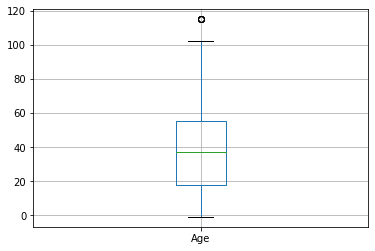

In [11]:
# Voir l'état de la distribution de l'age
data.boxplot("Age")

In [12]:
# Voir les personnes qui ont une age superieur à la normal
data[data["Age"]>100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [13]:
data[data["Age"]==115].index

Int64Index([63912, 63915, 68127, 76284, 97666], dtype='int64')

> Grace à la description des données, on a pu observé qu'il y a une ligne dont l'age est negatif.
> Puis, on observe plusieurs lignes (5 lignes) dans laquelle l'age du patient depasse largement l'age existant en général dans le données.

> On va procéder au suppression de ces lignes.


### Nettoyage des données


In [14]:
# Suppression des lignes dont l'Age est inferieur à 0
data.drop(labels = data[data["Age"]<0].index,inplace=True)
# Suppression des outliers
data.drop(labels = data[data["Age"]==115].index,inplace=True)
# Voir une aperçu du resultat
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


> Le nombre de ligne est maintenant 110521, donc 6 lignes ont été supprimé puisque le nombre de ligne original etait 110527. 
> La suppression des lignes s'est donc passé comme prévu.

On va encoder les données de la colonne **No-show** en nombre (**0** pour **No** et **1** pour **Yes**)

In [15]:
# Remplacement des données
data.replace({"No-show":{"No":0,"Yes": 1}},inplace = True)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Analyse exploratoires des données

Dans cette section, nous allons repondre aux questions que nous avons posé précédement.


### Question 1 : La non présence des patients à une scéance est-il liée à l'âge des patients ?

Pour repondre à cette question, nous allons voir une représentation graphique qui explique la proportion des patients qui ne se sont pas pointés au rendez-vous par rapport à ceux qui se sont pointé en fonction de leur âge.

Il ne nous interesse alors que les données uniques d'un patient. Il faut supprimer les informations redondant par patient.

In [16]:
data.PatientId.unique().shape

(62296,)

> A la fin de l'operation, on devrait avoir 62296 ligne

In [17]:
# Fonction qui se chargera de ne garder qu'un rendez-vous pour un patient
def remove_duplicate_patient(df,inplace = False):
    return data.drop(labels = data[data.PatientId.duplicated()==True].index,inplace=inplace)

In [18]:
# Copier les données avant la suppression
data_avant_suppression = data.copy()
# Suppression des Patients redondants
remove_duplicate_patient(data,inplace=True)
# Resultat 
data.shape

(62296, 14)

> Le resultat de la suppression est conforme au resultat attendu

In [19]:
# Separation des données
data_oui = data[data["No-show"]==1]
data_non = data[data["No-show"]==0]

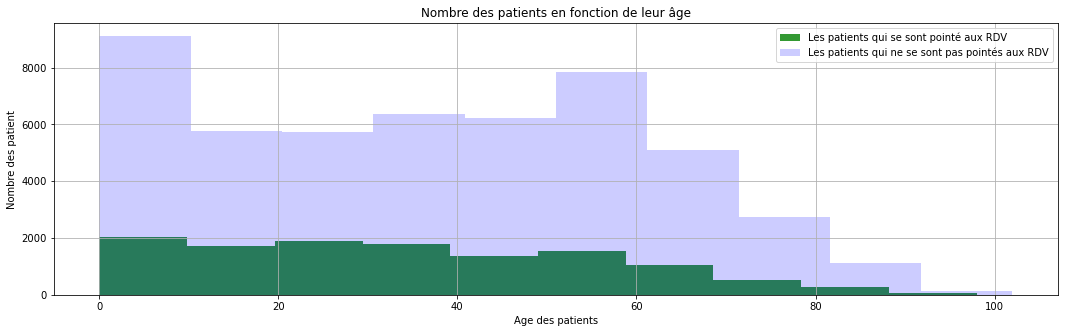

In [20]:
data_oui = data[data["No-show"]==1]
data_non = data[data["No-show"]==0]

# Afficher le graphique des données
plt.figure(figsize=[18,5])
data_oui.Age.hist(alpha=.8,color='green',label='Venu au RDV',bins=10)
data_non.Age.hist(alpha=.2,color='blue',label='Non venu au RDV',bins=10)
# Definition des libellés du graphique
plt.legend(labels=["Les patients qui se sont pointé aux RDV", "Les patients qui ne se sont pas pointés aux RDV"])
plt.title('Nombre des patients en fonction de leur âge')
plt.xlabel('Age des patients')
plt.ylabel('Nombre des patient');

> On peut voir à partir du diagramme que:
> - Les patients moins de 15ans et entre 50 et 65 ans et sont les plus à ne pas revenir aux prochains rendez-vous.
> - Il y a plus de patient qui ne reviennent pas que ceux qui reviennent

### Question 2 : Le nombre de sms que les patients reçoivent entraine-t-il le non attendance aux rendez-vous?

Pour cette question, on reprend les données complet avant la suppression des patients redondant

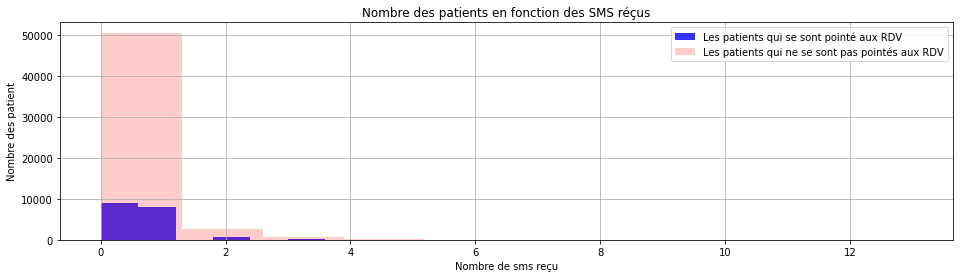

In [21]:
# Reprendre les données précédents
data = data_avant_suppression.copy()
data_oui = data[data["No-show"]==1].groupby("PatientId").sum()
data_non = data[data["No-show"]==0].groupby("PatientId").sum()
# Afficher le graphique avec un taille definie
plt.figure(figsize=[16,4])
data_oui.SMS_received.hist(alpha=.8,color='blue',label='Venu au RDV')
data_non.SMS_received.hist(alpha=.2,color='red',label='Non venu au RDV')
plt.legend(labels=["Les patients qui se sont pointé aux RDV", "Les patients qui ne se sont pas pointés aux RDV"])
plt.title('Nombre des patients en fonction des SMS réçus')
plt.xlabel('Nombre de sms reçu');
plt.ylabel('Nombre des patient');

> On voit sur cette graphique que meme si les patients qui reçoivent des moins de **2 sms** sont plus nombreux, il n'y a pas vraiement de relation entre attendance et le nombre de SMS que les patients reçoivent.

### Question 3 : La non présence des patients à-t-il une relation par le fait qu'ils sont scholarisés ou non ?

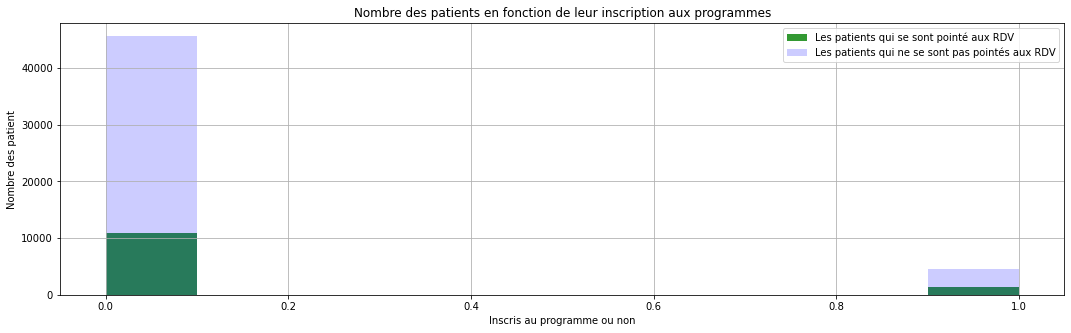

In [22]:
# Reprendre les données précédents
data = data_avant_suppression.copy()
remove_duplicate_patient(data,inplace=True)
data_oui = data[data["No-show"]==1]
data_non = data[data["No-show"]==0]
plt.figure(figsize=[18,5])
data_oui.Scholarship.hist(alpha=.8,color='green',label='Venu au RDV',bins=10)
data_non.Scholarship.hist(alpha=.2,color='blue',label='Non venu au RDV',bins=10)
plt.legend(labels=["Les patients qui se sont pointé aux RDV", "Les patients qui ne se sont pas pointés aux RDV"])
plt.title('Nombre des patients en fonction de leur inscription aux programmes')
plt.xlabel('Inscris au programme ou non')
plt.ylabel('Nombre des patient');

([<matplotlib.patches.Wedge at 0x24dc26c6400>,
 [Text(1.0382047790552322, 0.3634980560427755, 'Patients aux programmes - Venu'),
  Text(-1.0382047960718033, -0.3634980074409017, 'Patients aux programmes - Non Venu')],
 [Text(0.5662935158483083, 0.198271666932423, '10.72%'),
  Text(-0.5662935251300744, -0.19827164042231, '89.28%')])

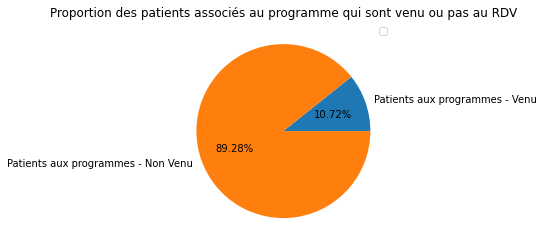

In [23]:
# Compter le nombre de patient
s_oui = len(data_oui.query("Scholarship == 1").PatientId)
s_non = len(data_non.query("Scholarship == 1").PatientId)
ns_oui = len(data_oui.query("Scholarship == 0").PatientId)
ns_non = len(data_non.query("Scholarship == 0").PatientId)
# Afficher le graphique
plt.legend(labels=["Les patients qui se sont pointé aux RDV", "Les patients qui ne se sont pas pointés aux RDV"])
plt.title('Proportion des patients associés au programme qui sont venu ou pas au RDV')
plt.pie([s_oui,ns_oui],labels=["Patients aux programmes - Venu","Patients aux programmes - Non Venu"],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x24dc2ad50a0>,
 [Text(1.0568671016950293, 0.3050113593864152, 'Patients non aux programmes - Venu'),
  Text(-1.0568670945557228, -0.3050113841241747, 'Patients non aux programmes - Non Venu')],
 [Text(0.576472964560925, 0.1663698323925901, '8.94%'),
  Text(-0.5764729606667579, -0.16636984588591347, '91.06%')])

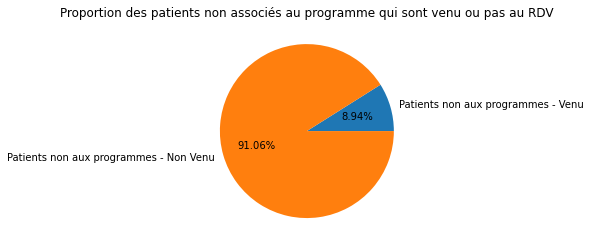

In [24]:
plt.title('Proportion des patients non associés au programme qui sont venu ou pas au RDV')
plt.pie([s_non,ns_non],labels=["Patients non aux programmes - Venu","Patients non aux programmes - Non Venu"],autopct='%1.2f%%')

> Il n'y a pas beaucoup de difference entre les données concernant l'attendance aux rendez-vous de ceux qui sont inscris aux programmes de bien être et ceux qui ne sont pas inscris.

<a id='conclusions'></a>
## Limites et Conclusions

#### Conclusions

> - Les patients moins de 15ans et entre 50 et 65 ans et sont les plus à ne pas revenir aux prochains rendez-vous. Il y a donc plus de chance qu'un patient ne revient pas aux rendez-vous si il est entre 50-65 ans.
> - Il y a plus de patient qui ne reviennent pas que ceux qui reviennent
> - On voit sur cette graphique que meme si les patients qui reçoivent des moins de **2 sms** sont plus nombreux, il n'y a pas vraiement de relation entre attendance et le nombre de SMS que les patients reçoivent.
> - Il n'y a pas beaucoup de difference entre les données concernant l'attendance aux rendez-vous de ceux qui sont inscris aux programmes de bien être et ceux qui ne sont pas inscris.

#### Limite

> - L'analyse que nous avons éffectué ne permet pas de conclure de façon générale la vraie raison de l'absence des patients au rendez-vous
> - Il reste encore plusieurs question qui peuvent être posés pour pouvoir determiner la raison de la non attendence des patients au rendez-vous, comme la relation entre les absences aux rendez-vous et le sex.

## Sites et références utilisés

> - https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub
> - https://www.kaggle.com/code/muhammedzidan/ooh-that-s-the-problem
> - https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib

In [25]:
from subprocess import call
call(['jupyter', 'nbconvert','--to',"webpdf", "--allow-chromium-download" ,'Analyse_de_donnees__No_Show_Appointment.ipynb'])

0